# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

For this project we are scraping data of Etherum to USD to analyze the trends in Volume (in terms of USD) over the period Jan 2020 (beg) - Jun 2021 (end). 

We want to see any increase or decrease in trading volume over time. 

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [79]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [80]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="de'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [81]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [82]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
   <title>
    Ethereum USD Historical Data | 


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [83]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:700])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="text-center">
    $27,149,143,847
   </td>
   <td class="text-center">
    $2,169.40
   </td>
   <td class="text-center">
    N/A
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-center" scope="


In [84]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[:5]

[<th class="font-semibold text-center" scope="row">2021-06-30</th>,
 <th class="font-semibold text-center" scope="row">2021-06-29</th>,
 <th class="font-semibold text-center" scope="row">2021-06-28</th>,
 <th class="font-semibold text-center" scope="row">2021-06-27</th>,
 <th class="font-semibold text-center" scope="row">2021-06-26</th>]

In [85]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[0].text

'2021-06-30'

Finding row length.

In [86]:
row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length

547

In [87]:
table.find_all('th', attrs={'class': 'text-center'})[:5]

[<th class="text-center">Date</th>,
 <th class="text-center">Market Cap</th>,
 <th class="text-center">Volume</th>,
 <th class="text-center">Open</th>,
 <th class="text-center">Close</th>]

Do the scrapping process here (please change this markdown with your explanation)

In [88]:
temp = []
rows = table.tbody.find_all("tr")
for rowItem in rows:
    period = rowItem.th.text.strip()
    volume = rowItem.find_all("td")[1].text.strip()
    temp.append((period,volume))

temp

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

In [89]:
temp = temp[::-1]
temp

[('2020-01-01', '$7,103,187,151'),
 ('2020-01-02', '$6,623,732,041'),
 ('2020-01-03', '$6,497,297,884'),
 ('2020-01-04', '$9,655,245,100'),
 ('2020-01-05', '$6,958,393,690'),
 ('2020-01-06', '$7,260,645,128'),
 ('2020-01-07', '$9,514,201,882'),
 ('2020-01-08', '$9,440,938,788'),
 ('2020-01-09', '$10,095,847,759'),
 ('2020-01-10', '$7,280,640,218'),
 ('2020-01-11', '$10,273,370,788'),
 ('2020-01-12', '$9,737,605,323'),
 ('2020-01-13', '$8,488,793,478'),
 ('2020-01-14', '$8,019,794,567'),
 ('2020-01-15', '$18,970,204,899'),
 ('2020-01-16', '$17,862,385,532'),
 ('2020-01-17', '$14,605,493,159'),
 ('2020-01-18', '$15,915,322,020'),
 ('2020-01-19', '$15,808,136,411'),
 ('2020-01-20', '$14,003,433,869'),
 ('2020-01-21', '$10,983,216,126'),
 ('2020-01-22', '$8,267,420,453'),
 ('2020-01-23', '$8,809,189,829'),
 ('2020-01-24', '$9,017,537,604'),
 ('2020-01-25', '$11,043,498,595'),
 ('2020-01-26', '$8,673,816,085'),
 ('2020-01-27', '$10,518,901,915'),
 ('2020-01-28', '$12,435,457,693'),
 ('2020-

## Creating data frame & Data wrangling

Put the array into dataframe

In [90]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period','volume')) 
df.head()

,period,volume
0,2020-01-01,"$7,103,187,151"
1,2020-01-02,"$6,623,732,041"
2,2020-01-03,"$6,497,297,884"
3,2020-01-04,"$9,655,245,100"
4,2020-01-05,"$6,958,393,690"


In [91]:
df.dtypes

period    object
volume    object
dtype: object

Do the data cleaning here:
*remove the "," 
*remove the USD 
*change volume from 'object' to 'float64'.
*change 'period' to 'datetime64;

In [92]:
df['volume'] = df['volume'].str.replace(",","")
df['volume'] = df['volume'].str.replace("$","")
df['volume'] = df['volume'].astype('float64')
df['period'] = df['period'].astype('datetime64')

df.dtypes

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_7868\348716061.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['volume'] = df['volume'].str.replace("$","")


period    datetime64[ns]
volume           float64
dtype: object

Data visualisation *set the index column to 'period'

In [93]:
df = df.set_index('period')

In [94]:
df.head()

,volume
period,
2020-01-01,7.103187e+09
2020-01-02,6.623732e+09
2020-01-03,6.497298e+09
2020-01-04,9.655245e+09
2020-01-05,6.958394e+09


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='period'>

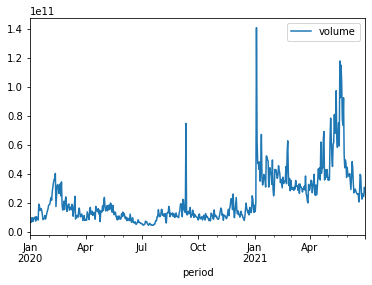

In [77]:
df.plot()

There is a significant increase in volume in the period between September 2020 - October 2020.
The highest trading volume is between Jan 2021 - Feb 2021. 
The lowest trading volume is between Jul 2020 - Aug 2020. 
There is a significant increase in volume between May 2021 - Jun 2021. 

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.